<a href="https://colab.research.google.com/github/jucardozo/Clasificador-de-Ropa/blob/main/TP1RN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Trabajo Práctico 1

Juan Cardozo 60530


In [21]:
#Inclusion de librerias útiles
import tensorflow as tf
import tensorflow_datasets as tfds
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import random
import cv2
import albumentations as A
from tensorflow.keras.optimizers import SGD,AdamW
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

Codigo.

In [3]:
#sentencias de importacion de input-output y google colab files
import io
from google.colab import files

uploaded = files.upload()
data_trainDF = pd.read_csv(io.BytesIO(uploaded['train_labels.csv']))
data_train = data_trainDF.values
# El filename es el nombre del archivo.

from google.colab import drive
drive.mount("/content/drive/")

Saving train_labels.csv to train_labels.csv
Mounted at /content/drive/


In [4]:

data_train.shape
data_train=data_train.reshape(60000)
data_train.shape
y_train=data_train
print(type(data_train))

## x_train -> Imagees 
##y_train -> Labels

<class 'numpy.ndarray'>


In [5]:
#Descargar set de datos de Fashion MNIST //despues ver como poner los del profe

#datos, metadatos = tfds.load('fashion_mnist', as_supervised=True, with_info=True)(con datos directos de fashion Mnist)
imagenes=np.load('/content/drive/MyDrive/Dataset tp redes neuronales/fashion-mnist-itba-lab-2023q1/train_images.npy')
x_test=np.load('/content/drive/MyDrive/Dataset tp redes neuronales/fashion-mnist-itba-lab-2023q1/test_images.npy')
#Imprimir los metadatos para ver que trae el set




Funciones Secundarias.


In [6]:

x_train = list(imagenes[:60000])

new_labels=list(data_train[:60000])

#Funciones Utilizadas para hacer el data aumentation
def gen_imagen_FLIP(imagenes,etiquetas):
  for i in range(len(imagenes)):
    transform = A.HorizontalFlip(p=0.5)
    random.seed(7)
    x_train.append(transform(image=imagenes[i])['image'])
    new_labels.append(data_train[i])
    
def gen_imagen_ROTATE(imagenes,etiquetas):   
  for i in range(len(imagenes)):
    transform = A.RandomRotate90(p=0.5)
    random.seed(7)
    x_train.append(transform(image=imagenes[i])['image'])
    new_labels.append(data_train[i])
    
#Funcion para normalizar la entrada 
#Hace que la red aprenda mejor y mas rapido
def normalizar(imagenes):
  imagenes = tf.cast(imagenes, tf.float32)
  imagenes /= 255 #Aqui lo pasa de 0-255 a 0-1


#Ejecucion de las mismas
gen_imagen_FLIP(imagenes,list(data_train))
gen_imagen_ROTATE(imagenes,list(data_train))
x_train=np.array(x_train)
normalizar(x_train) 


Visualizacion de algunos de los datos de entrada 

0


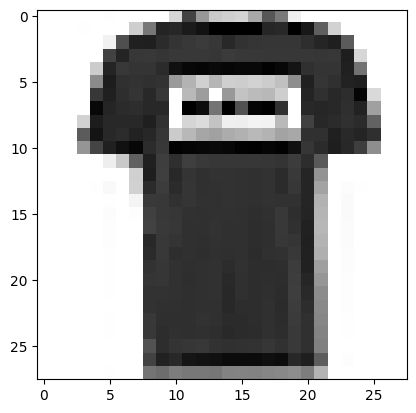

In [7]:
print(data_train[1]) #dato crudo
plt.imshow(imagenes[1],cmap=plt.cm.binary)

Dato luego del data aumentation

180000
180000
0


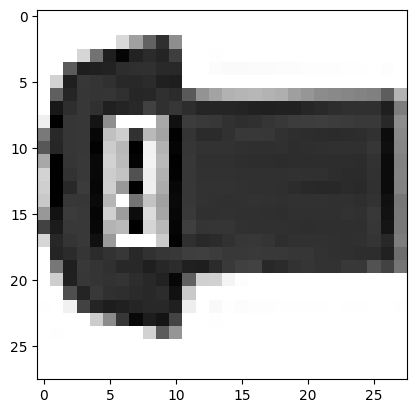

In [8]:
#Chusmeo el dato, Normalizado
print(len(new_labels))
print(len(x_train))
print(new_labels[120001])
plt.imshow(x_train[120001],cmap=plt.cm.binary)

In [ ]:
#hacer algo pa mostrar todo

Distribución de los Datos de entrada

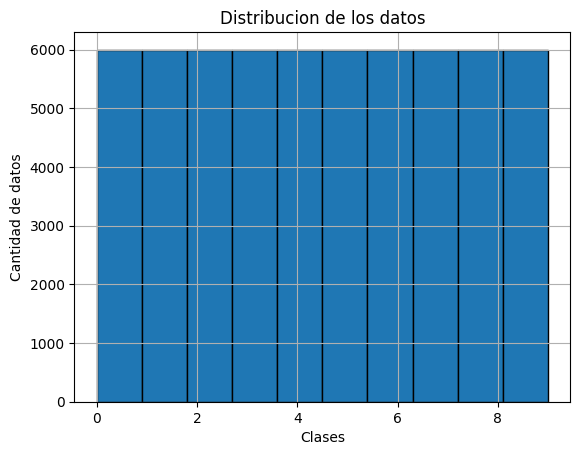

In [10]:
plt.hist(data_train,edgecolor='black')
plt.xlabel("Clases")
plt.ylabel("Cantidad de datos")
plt.title("Distribucion de los datos")
plt.grid()

In [9]:
y_sparse_train = np.zeros([len(x_train),10])
y_sparse_test = np.zeros([10000,10])
for idx in range(len(x_train)):
    y_sparse_train[idx,new_labels[idx]] = 1



PRIMERA RED NEURONAL 

SOLO CON EL USO DE LA CAPA SOFTMAX.

In [10]:
modelo = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax) #Para redes de clasificacion
])

In [11]:
#Compilo el modelo

modelo.compile(
    optimizer='adam',
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=["accuracy"]
)

#Shuffle y repeat hacen que los datos esten mezclados de manera aleatoria para que la red
#no se vaya a aprender el orden de las cosas
#datos = datos.repeat().shuffle(num_ej_entrenamiento).batch(TAMANO_LOTE)
modelo.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [12]:
#Entrenar
historial = modelo.fit(x = x_train, y = y_sparse_train,batch_size = 128, epochs=20)


Epoch 1/20
1407/1407 [==============================] - 6s 3ms/step - loss: 18.4060 - accuracy: 0.6493
Epoch 2/20
1407/1407 [==============================] - 6s 4ms/step - loss: 10.1178 - accuracy: 0.6925
Epoch 3/20
1407/1407 [==============================] - 4s 3ms/step - loss: 8.1878 - accuracy: 0.6987
Epoch 4/20
1407/1407 [==============================] - 5s 3ms/step - loss: 7.2660 - accuracy: 0.6978
Epoch 5/20
1407/1407 [==============================] - 6s 4ms/step - loss: 6.6249 - accuracy: 0.6976
Epoch 6/20
1407/1407 [==============================] - 5s 3ms/step - loss: 6.2593 - accuracy: 0.6992
Epoch 7/20
1407/1407 [==============================] - 6s 5ms/step - loss: 6.1480 - accuracy: 0.6981
Epoch 8/20
1407/1407 [==============================] - 5s 4ms/step - loss: 5.8961 - accuracy: 0.6995
Epoch 9/20
1407/1407 [==============================] - 5s 3ms/step - loss: 5.7993 - accuracy: 0.6996
Epoch 10/20
1407/1407 [==============================] - 6s 4ms/step - loss: 5.6

ALGUNOS GRAFICOS REPRESENTATIVOS

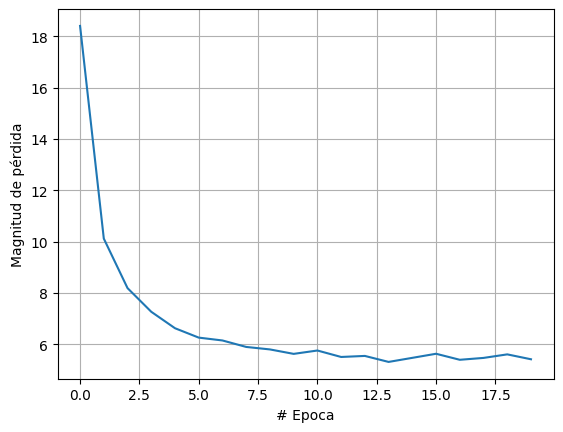

In [13]:
plt.xlabel("# Epoca")
plt.grid()
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])

KeyError: ignored

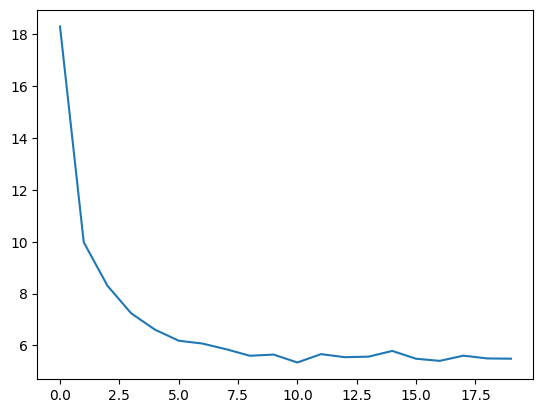

In [16]:
plt.plot(historial.history["loss"], label="train")
plt.plot(historial.history["val_loss"], label="val")
ptl.title("Distribucion de pesos sin inicializar")
plt.legend()
plt.show()

(784, 10)
[ 0.2827867  -4.070218   -0.6533595  -0.41746923 -2.7189095  11.262999
  0.67362046  0.2934259  -2.785999   -2.1232152 ]


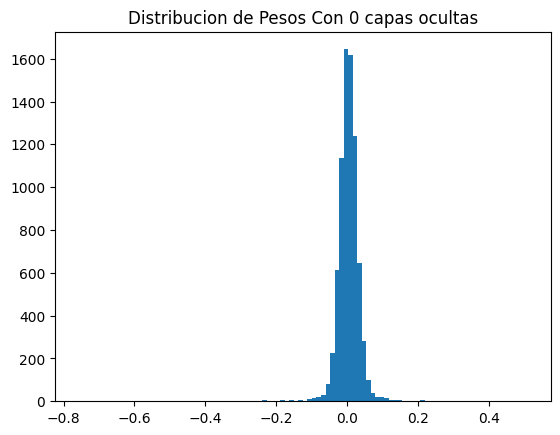

In [14]:
weights = modelo.get_weights()[0]
biases = modelo.get_weights()[1]
print(weights.shape)
print(biases)
plt.hist(weights.flatten(), 100)
plt.title("Distribucion de Pesos Con 0 capas ocultas")
plt.show()

RED NEURONAL CON OPTIMIZADOR SGD LEARNING RATE (0.0001)

In [15]:
modelo = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax) #Para redes de clasificacion
])
modelo.compile(
    optimizer=SGD(learning_rate=0.0001),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=["accuracy"]
)
#Entrenar
historial = modelo.fit(x = x_train, y = y_sparse_train,batch_size = 128, epochs=20)

Epoch 1/20
1407/1407 [==============================] - 5s 3ms/step - loss: 27.7246 - accuracy: 0.5974
Epoch 2/20
1407/1407 [==============================] - 4s 3ms/step - loss: 18.5836 - accuracy: 0.6664
Epoch 3/20
1407/1407 [==============================] - 6s 4ms/step - loss: 16.6664 - accuracy: 0.6788
Epoch 4/20
1407/1407 [==============================] - 4s 3ms/step - loss: 16.0063 - accuracy: 0.6830
Epoch 5/20
1407/1407 [==============================] - 4s 3ms/step - loss: 15.6276 - accuracy: 0.6854
Epoch 6/20
1407/1407 [==============================] - 5s 3ms/step - loss: 15.5536 - accuracy: 0.6851
Epoch 7/20
1407/1407 [==============================] - 4s 3ms/step - loss: 15.1664 - accuracy: 0.6883
Epoch 8/20
1407/1407 [==============================] - 4s 3ms/step - loss: 15.0932 - accuracy: 0.6880
Epoch 9/20
1407/1407 [==============================] - 4s 3ms/step - loss: 15.0154 - accuracy: 0.6890
Epoch 10/20
1407/1407 [==============================] - 6s 4ms/step - lo

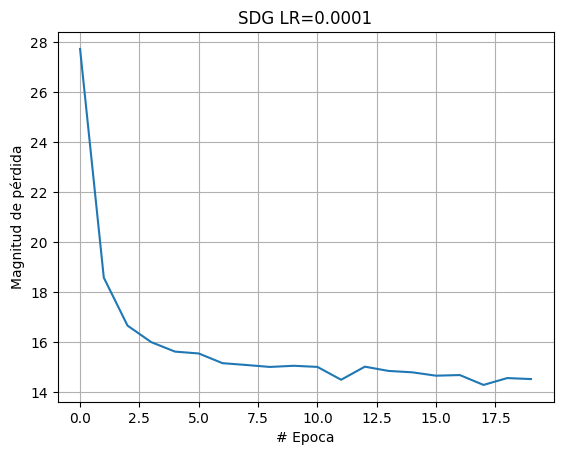

In [18]:
plt.xlabel("# Epoca")
plt.grid()
plt.ylabel("Magnitud de pérdida")
plt.title("SDG LR=0.0001")
plt.plot(historial.history["loss"])

INICIALIZADORES DE PESO

In [28]:
modelo = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(10,kernel_initializer=tf.keras.initializers.GlorotNormal(),activation=tf.nn.softmax) #Para redes de clasificacion
])
modelo.compile(
    optimizer='adam',
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=["accuracy"]
)
modelo.summary()
#Entrenar
historial = modelo.fit(x = x_train, y = y_sparse_train,batch_size = 128, epochs=20)

Epoch 1/20
1407/1407 [==============================] - 7s 3ms/step - loss: 17.8538 - accuracy: 0.6482
Epoch 2/20
1407/1407 [==============================] - 5s 3ms/step - loss: 9.9316 - accuracy: 0.6928
Epoch 3/20
1407/1407 [==============================] - 10s 7ms/step - loss: 8.0150 - accuracy: 0.6967
Epoch 4/20
1407/1407 [==============================] - 5s 4ms/step - loss: 7.2771 - accuracy: 0.6982
Epoch 5/20
1407/1407 [==============================] - 5s 4ms/step - loss: 6.6497 - accuracy: 0.6996
Epoch 6/20
1407/1407 [==============================] - 4s 3ms/step - loss: 5.9956 - accuracy: 0.7000
Epoch 7/20
1407/1407 [==============================] - 4s 3ms/step - loss: 6.1613 - accuracy: 0.6978
Epoch 8/20
1407/1407 [==============================] - 4s 3ms/step - loss: 5.8783 - accuracy: 0.7001
Epoch 9/20
1407/1407 [==============================] - 6s 4ms/step - loss: 5.5987 - accuracy: 0.7004
Epoch 10/20
1407/1407 [==============================] - 5s 3ms/step - loss: 5.7

(784, 10)
[ 0.26836    -4.1102657  -0.63779134 -0.4114854  -2.6772895  11.251185
  0.7393138   0.31680173 -2.8492465  -2.1631522 ]


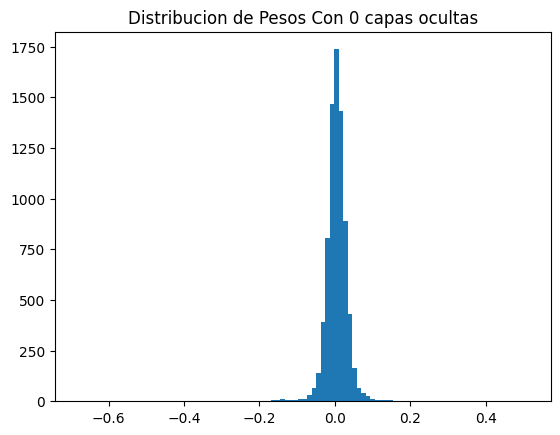

In [29]:
weights = modelo.get_weights()[0]
biases = modelo.get_weights()[1]
print(weights.shape)
print(biases)
plt.hist(weights.flatten(), 100)
plt.title("Distribucion de Pesos Con 0 capas ocultas")
plt.show()

RED NEURONAL VARIANDO EL TAMAÑO DE LA RED
1 CAPA OCULTA Y 50 NEURONAS

In [17]:
modelo = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(50, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax) #Para redes de clasificacion
])

In [18]:
#Compilo el modelo
modelo.compile(
    optimizer='adam',
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=["accuracy"]
)

#Shuffle y repeat hacen que los datos esten mezclados de manera aleatoria para que la red
#no se vaya a aprender el orden de las cosas
#datos = datos.repeat().shuffle(num_ej_entrenamiento).batch(TAMANO_LOTE)
modelo.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 50)                39250     
                                                                 
 dense_2 (Dense)             (None, 10)                510       
                                                                 
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


In [19]:
#Entrenar
historial = modelo.fit(x = x_train, y = y_sparse_train,batch_size = 128, epochs=20)

Epoch 1/20
1407/1407 [==============================] - 7s 4ms/step - loss: 2.7046 - accuracy: 0.3850
Epoch 2/20
1407/1407 [==============================] - 6s 4ms/step - loss: 1.3075 - accuracy: 0.5054
Epoch 3/20
1407/1407 [==============================] - 6s 4ms/step - loss: 0.9496 - accuracy: 0.6535
Epoch 4/20
1407/1407 [==============================] - 6s 4ms/step - loss: 0.8111 - accuracy: 0.6954
Epoch 5/20
1407/1407 [==============================] - 5s 3ms/step - loss: 0.7492 - accuracy: 0.7131
Epoch 6/20
1407/1407 [==============================] - 6s 4ms/step - loss: 0.7184 - accuracy: 0.7225
Epoch 7/20
1407/1407 [==============================] - 5s 3ms/step - loss: 0.6938 - accuracy: 0.7344
Epoch 8/20
1407/1407 [==============================] - 5s 3ms/step - loss: 0.6768 - accuracy: 0.7452
Epoch 9/20
1407/1407 [==============================] - 8s 6ms/step - loss: 0.6613 - accuracy: 0.7517
Epoch 10/20
1407/1407 [==============================] - 5s 4ms/step - loss: 0.648

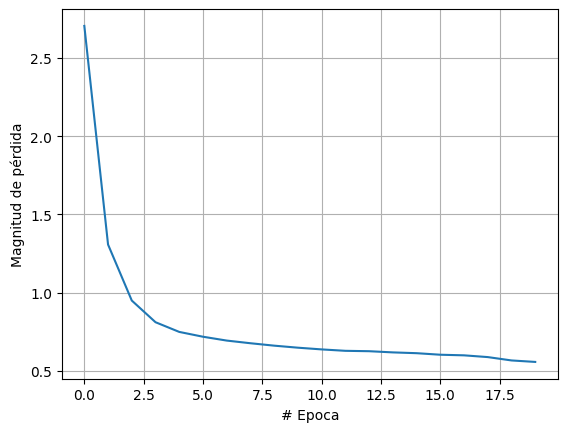

In [20]:
plt.xlabel("# Epoca")
plt.grid()
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])

In [ ]:
weights = modelo.get_weights()[0]
biases = modelo.get_weights()[1]
print(weights.shape)
print(biases)
plt.hist(weights.flatten(), 100)
plt.title("Distribucion de Pesos Con 1 capas ocultas")
plt.show()

RED NEURONAL VARIANDO EL TAMAÑO DE LA RED 3 CAPA OCULTA 

In [21]:
modelo = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(100, activation=tf.nn.relu),
  tf.keras.layers.Dense(100, activation=tf.nn.relu),
  tf.keras.layers.Dense(50, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax) #Para redes de clasificacion
])

In [22]:
#Compilo el modelo
modelo.compile(
    optimizer='adam',
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=["accuracy"]
)

modelo.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 100)               78500     
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 50)                5050      
                                                                 
 dense_6 (Dense)             (None, 10)                510       
                                                                 
Total params: 94,160
Trainable params: 94,160
Non-trainable params: 0
_________________________________________________________________


In [23]:
#Entrenar
historial = modelo.fit(x = x_train, y = y_sparse_train,batch_size = 128, epochs=20)

Epoch 1/20
1407/1407 [==============================] - 9s 6ms/step - loss: 1.4609 - accuracy: 0.7235
Epoch 2/20
1407/1407 [==============================] - 7s 5ms/step - loss: 0.5433 - accuracy: 0.8104
Epoch 3/20
1407/1407 [==============================] - 8s 6ms/step - loss: 0.4773 - accuracy: 0.8305
Epoch 4/20
1407/1407 [==============================] - 8s 6ms/step - loss: 0.4416 - accuracy: 0.8421
Epoch 5/20
1407/1407 [==============================] - 7s 5ms/step - loss: 0.4202 - accuracy: 0.8494
Epoch 6/20
1407/1407 [==============================] - 9s 7ms/step - loss: 0.4018 - accuracy: 0.8559
Epoch 7/20
1407/1407 [==============================] - 7s 5ms/step - loss: 0.3865 - accuracy: 0.8617
Epoch 8/20
1407/1407 [==============================] - 9s 6ms/step - loss: 0.3721 - accuracy: 0.8656
Epoch 9/20
1407/1407 [==============================] - 7s 5ms/step - loss: 0.3606 - accuracy: 0.8699
Epoch 10/20
1407/1407 [==============================] - 9s 6ms/step - loss: 0.350

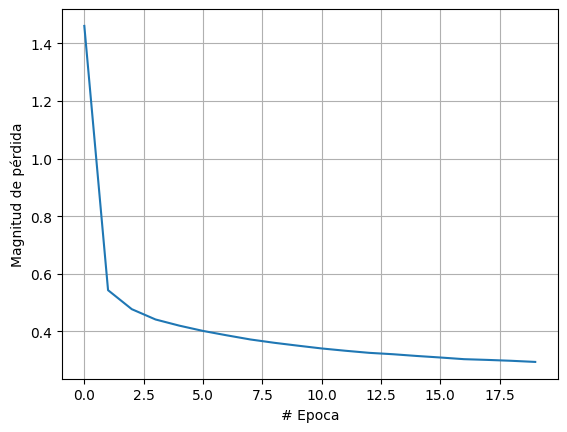

In [24]:
plt.xlabel("# Epoca")
plt.grid()
plt.ylabel("Magnitud de pérdida")
plt.title("3 capas ocultas")
plt.plot(historial.history["loss"])

(784, 100)
[-0.03653021 -0.36047825 -0.00574688  1.0632966   0.15935615  0.5855867
  0.10118582  0.04135606  0.29700303 -0.03898719 -0.01004581  0.35864657
 -0.41641736 -0.38348863 -0.8948317   0.68006575 -0.02186318  0.01165112
  0.03617122  0.39640886  0.59585226 -0.09600474  0.34843028 -0.48415184
  0.962139   -0.01470059  0.60989714 -0.01464317 -0.03075193 -0.12864493
  0.02574267  0.14332029 -0.02788151  0.34195635 -0.23921394 -0.09114224
 -0.02342991  0.15885642 -0.03751089 -0.00161368  0.782914    1.2503536
 -0.05001778 -0.03713719 -0.02150723  0.22513042 -0.2056638   1.0094874
 -0.01556539  0.3354785   0.11527677  1.255847   -0.04523151  0.00309731
 -0.00613005 -0.13160822 -0.10379614 -0.03987812  0.10164009 -0.01810879
  0.48242638  0.720295    0.72048616 -0.0713077   0.57231164 -0.47565585
  0.02972009 -0.02495301  0.07483909 -0.05621171  0.12846391 -0.01791814
  0.01981926  0.54518336  0.39188758  0.47408947 -0.03547711 -0.01351697
  0.6726929   0.33308953  0.7839705   0.097

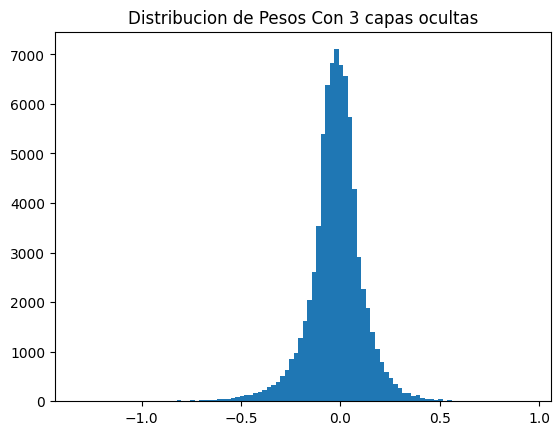

In [26]:
weights = modelo.get_weights()[0]
biases = modelo.get_weights()[1]
print(weights.shape)
print(biases)
plt.hist(weights.flatten(), 100)
plt.title("Distribucion de Pesos Con 3 capas ocultas")
plt.show()

FUNCIONES DE ACTIVACION DISTINTAS A LA RELU. 

In [23]:
modelo = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(100, activation=tf.nn.sigmoid),
  tf.keras.layers.Dense(100, activation=tf.nn.sigmoid),
  tf.keras.layers.Dense(50, activation=tf.nn.sigmoid),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax) #Para redes de clasificacion
])
#Compilo el modelo
modelo.compile(
    optimizer='adam',
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=["accuracy"]
)

modelo.summary()
#Entrenar
historial = modelo.fit(x = x_train, y = y_sparse_train,batch_size = 128, epochs=20)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 100)               78500     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 50)                5050      
                                                                 
 dense_8 (Dense)             (None, 10)                510       
                                                                 
Total params: 94,160
Trainable params: 94,160
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
1407/1407 [============================

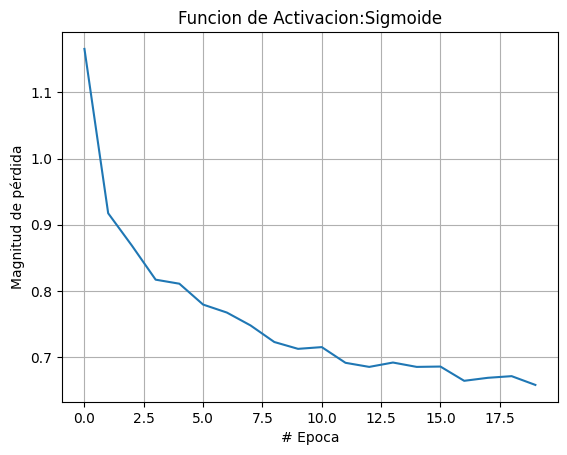

In [24]:
plt.xlabel("# Epoca")
plt.grid()
plt.ylabel("Magnitud de pérdida")
plt.title("Funcion de Activacion:Sigmoide")
plt.plot(historial.history["loss"])

In [27]:
modelo.load_weights('one-hidden-last.mnist.hdf5')
modelo.evaluate(x_train, y_train_categorical)

SyntaxError: ignored

RED NEURONAL CON ALGUNAS MEJORAS

In [ ]:
#Creo el modelo
modelo = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(100, activation=tf.nn.relu),
   tf.keras.layers.Dense(100, activation=tf.keras.layers.LeakyReLU(0.1)),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax) #Para redes de clasificacion
])

In [ ]:
#Compilo el modelo
modelo.compile(
    optimizer='adam',
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['Accuracy']
)

#Shuffle y repeat hacen que los datos esten mezclados de manera aleatoria para que la red
#no se vaya a aprender el orden de las cosas
#datos = datos.repeat().shuffle(num_ej_entrenamiento).batch(TAMANO_LOTE)
modelo.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_21 (Dense)            (None, 100)               78500     
                                                                 
 dense_22 (Dense)            (None, 100)               10100     
                                                                 
 dense_23 (Dense)            (None, 10)                1010      
                                                                 
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Entrenar
historial = modelo.fit(x = x_train, y = y_sparse_train,batch_size = 128, epochs=20)
#Baje batch size =>  0.8597(32,epochs=10)
#=> (32,15)=>0.8707

Epoch 1/20
1407/1407 [==============================] - 10s 6ms/step - loss: 1.9008 - Accuracy: 0.7157
Epoch 2/20
1407/1407 [==============================] - 7s 5ms/step - loss: 0.6016 - Accuracy: 0.7956
Epoch 3/20
1407/1407 [==============================] - 9s 6ms/step - loss: 0.5435 - Accuracy: 0.8122
Epoch 4/20
1407/1407 [==============================] - 8s 6ms/step - loss: 0.5114 - Accuracy: 0.8228
Epoch 5/20
1407/1407 [==============================] - 11s 8ms/step - loss: 0.4872 - Accuracy: 0.8302
Epoch 6/20
1407/1407 [==============================] - 9s 6ms/step - loss: 0.4603 - Accuracy: 0.8373
Epoch 7/20
1407/1407 [==============================] - 7s 5ms/step - loss: 0.4510 - Accuracy: 0.8426
Epoch 8/20
1407/1407 [==============================] - 9s 6ms/step - loss: 0.4310 - Accuracy: 0.8481
Epoch 9/20
1407/1407 [==============================] - 7s 5ms/step - loss: 0.4198 - Accuracy: 0.8518
Epoch 10/20
1407/1407 [==============================] - 8s 6ms/step - loss: 0.4

In [ ]:
y_test = modelo.predict(x_test)
labels = np.array([np.argmax(prediction) for prediction in y_test])
submission=pd.DataFrame({"id": np.arange(10000) , "Category" : labels})
submission.to_csv("submission.csv",index=False)


KeyError: ignored

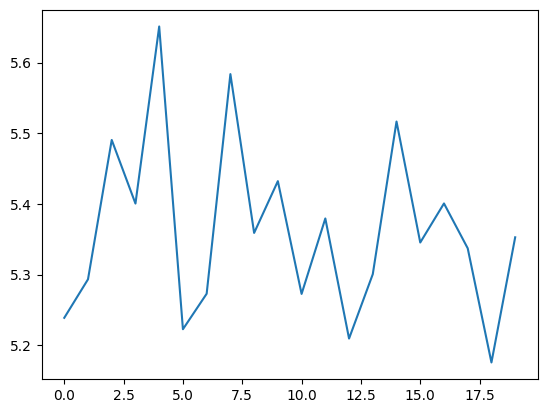

In [ ]:
plt.plot(historial.history["loss"], label="train")
plt.plot(historial.history["val_loss"], label="val")
plt.legend()
plt.show()

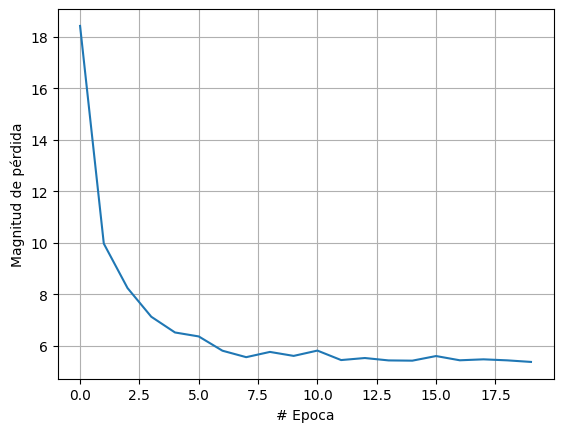

In [ ]:
plt.xlabel("# Epoca")
plt.grid()
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])

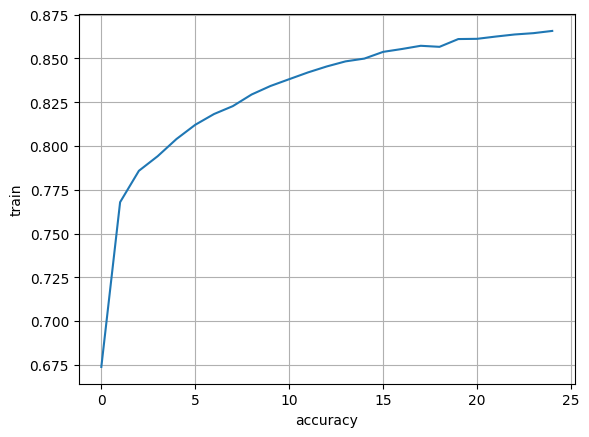

In [ ]:
plt.plot(historial.history["accuracy"], label="train")
plt.xlabel("accuracy")
plt.ylabel("train")
plt.grid()
plt.show()

In [ ]:
#Curva ROC Como se hace para un multiclase
y_test = modelo.predict(imagenes[0:10000])
labels = np.array([np.argmax(prediction) for prediction in y_test])
submission=pd.DataFrame({"id": np.arange(10000) , "Category" : labels})
submission.to_csv("submission.csv",index=False)
y_test=y_test[:,1]
#Model_auc=roc_auc_score(y_sparse_train,y_test)
# Calculamos las curvas ROC
lr_fpr, lr_tpr, _ = roc_curve(y_sparse_train, y_test)
# Pintamos las curvas ROC
plt.plot(lr_fpr, lr_tpr, marker='.', label='Softmax')
# Etiquetas de los ejes
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.legend()
plt.show()

313/313 [==============================] - 1s 2ms/step


ValueError: ignored

In [ ]:

y_train=np.array(new_labels)
print(y_train)
print(x_train)
print(type(y_train))
print(type(x_train))
print(len(y_train))
print(len(x_train))


[9 0 0 ... 3 0 5]
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
180000
180000


In [ ]:
##MultiLayer Perceptron
import warnings

from sklearn.exceptions import ConvergenceWarning
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
def normalizar(imagenes):
  imagenes = tf.cast(imagenes, tf.float32)
  imagenes /= 255 #Aqui lo pasa de 0-255 a 0-1

datos, metadatos = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
#normalizar(datos)
X_train, X_test, y_train, y_test = train_test_split(datos,metadatos, random_state=0, test_size=0.7)

clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                     hidden_layer_sizes=(100,75,50, 10), random_state=1)
clf.fit(X_train, y_train)
#mlp = MLPClassifier(
#    hidden_layer_sizes=(40,),
 #   max_iter=8,
  #  alpha=1e-4,
  #  solver="lbfgs",
   # verbose=10,
  #  random_state=1,
  #  learning_rate_init=0.2,
#)
#with warnings.catch_warnings():
 #   warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
#mlp.fit(x_train, y_train)
print("Training set score: %f" % clf.score(X, y))

ValueError: ignored

In [ ]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 